# Homework Assignment \#3

### Problem 1.

In [1]:
import numpy as np
from scipy.stats import bernoulli, binom, poisson, norm, expon
import seaborn as sns

In [2]:
D = [[1], [0], [0], [0], [0], [1], [0], [1], [0], [0],
     [1], [1], [0], [0], [0], [0], [1], [0], [0], [0]]
mean_d = np.mean(D)
var_d = np.var(D)
print(mean_d)
print(var_d)

0.3
0.20999999999999996


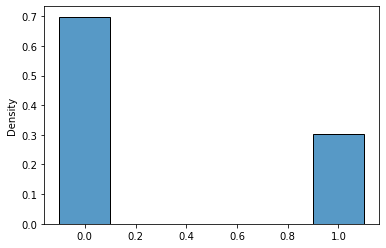

In [14]:
X = bernoulli(mean_d)
X_samples = X.rvs(100000) #무작위 표본 생성
sns.histplot(X_samples, stat="density", discrete=True, shrink=0.2);

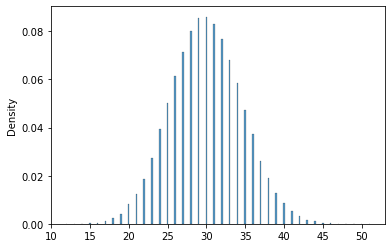

In [4]:
N = 100  # an additional assumption on the binomial trial
X = binom(N, mean_d)
X_samples = X.rvs(100000)
sns.histplot(X_samples, stat="density", discrete=True, shrink=0.2);

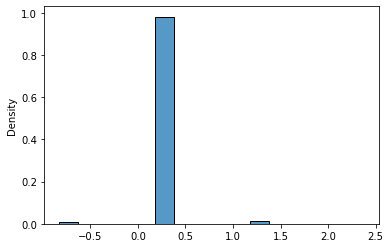

In [15]:
X = norm(mean_d, var_d)
X_samples = X.rvs(100000)
sns.histplot(X_samples, stat="density", discrete=True, shrink=0.2);

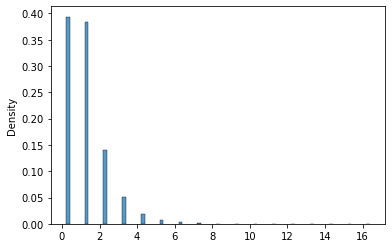

In [16]:
X = expon(mean_d)
X_samples = X.rvs(10000000)
sns.histplot(X_samples, stat="density", discrete=True, shrink=0.2);

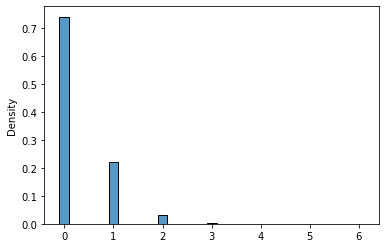

In [17]:
X = poisson(mean_d)
X_samples = X.rvs(10000000)
sns.histplot(X_samples, stat="density", discrete=True, shrink=0.2);

### Problem 5.

In [4]:
# source: https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

def kde1D(x, bandwidth, kernel='tophat', bins=1000, color='darkorange', **kwargs):
    
    lw = 2 # line width
    
    xx = np.linspace(-0.1, 0.1, bins)[:, np.newaxis]
    # true_dens = (0.3 * norm(0, 1).pdf(xx[:, 0]) + 0.7 * norm(5, 1).pdf(xx[:, 0]))
    true_dens = norm(np.mean(X), np.std(X)).pdf(xx[:, 0])
    
    fig, ax = plt.subplots()
    ax.fill(xx[:, 0], true_dens, fc='black', alpha=0.2, label='input distribution')
    
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth)
    kde.fit(X)
    
    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde.score_samples(xx))
    ax.plot(xx[:, 0], z, color=color, lw=lw, linestyle='-', label="kernel = '{0}'".format(kernel))
    
    ax.legend(loc='upper left')
    ax.text(6.5, 0.3, "N={0} points".format(N))
    

# # Plot a 1D density example
# N = 100
# # np.random.seed(777)  # uncomment this if you want to fix the result
# X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
#                     np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

# kde1D(X, 0.5)
# X

In [12]:
from sklearn.neighbors import KernelDensity

def kde2D(x, y, bandwidth, kernel='tophat', xbins=100j, ybins=100j, cmap='RdPu', **kwargs): 
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[x.min():x.max():xbins, y.min():y.max():ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth, **kwargs)
    kde.fit(xy_train)
    
    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde.score_samples(xy_sample))
    zz = np.reshape(z, xx.shape)

    plt.pcolormesh(xx, yy, zz, cmap=cmap, shading='auto')
    plt.scatter(x, y, s=1, facecolor='blue')
    cset = plt.contour(xx, yy, zz, colors='k', linewidths=0.5)
    plt.clabel(cset, inline=1, fontsize=10)

    return xx, yy, zz


# np.random.seed(777)  # uncomment this if you want to fix the result
# m1 = np.random.normal(size=100)
# m2 = np.random.normal(scale=0.7, size=100)

# x, y = m1 + m2, m1 - m2;

# kde2D(x, y, 1);





In [21]:
import pandas as pd
data = pd.read_csv('hw3_data.csv')
data.head()

,subject,amygdala,acc,orientation
0,1,0.0051,-0.0286,2
1,2,-0.0674,0.0007,3
2,3,-0.0257,-0.0110,3
3,4,0.0504,-0.0167,2
4,5,0.0125,-0.0005,5


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

def kde1D(x, bandwidth, kernel='tophat', bins=1000, color='darkorange', **kwargs):
    
    lw = 2 # line width
    
    xx = np.linspace(-0.1, 0.1, bins)[:, np.newaxis]
    # true_dens = (0.3 * norm(0, 1).pdf(xx[:, 0]) + 0.7 * norm(5, 1).pdf(xx[:, 0]))
    true_dens = norm(np.mean(X), np.std(X)).pdf(xx[:, 0])
    
    fig, ax = plt.subplots()
    ax.fill(xx[:, 0], true_dens, fc='black', alpha=0.2, label='input distribution')
    
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth)
    kde.fit(X)
    
    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde.score_samples(xx))
    ax.plot(xx[:, 0], z, color=color, lw=lw, linestyle='-', label="kernel = '{0}'".format(kernel))
    
    ax.legend(loc='upper left')
    ax.text(6.5, 0.3, "N={0} points".format(N))

#### (a)

In [23]:
X = data['amygdala']
X = np.array(X)
X = X.reshape(-1,1)

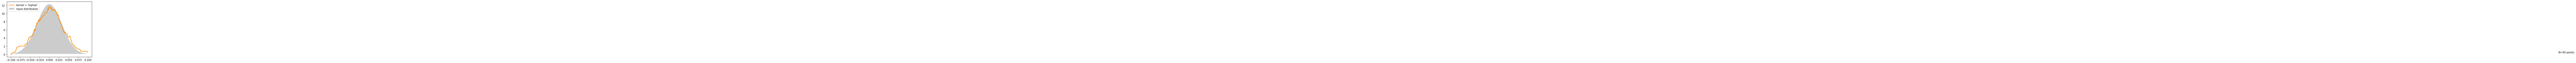

In [27]:
# prob1 = [X[i:i + 1] for i in range(0, len(X), 1)]
N = len(X)
kde1D(X, 0.03)

#### (b)

In [29]:
X = data['acc']
X = np.array(X)
X = X.reshape(-1,1)

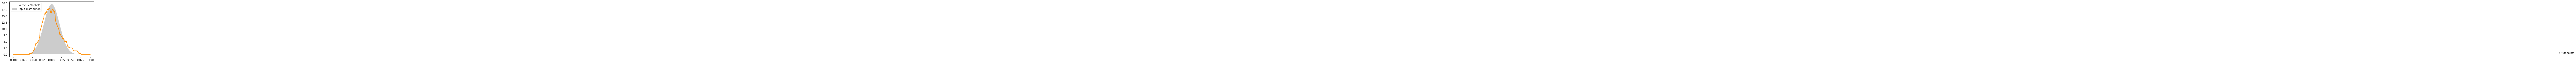

In [36]:
N = len(X)
kde1D(X, 0.02)

#### (c)

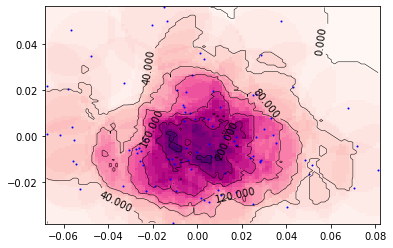

In [68]:
from sklearn.neighbors import KernelDensity

def kde2D(x, y, bandwidth, kernel='tophat', xbins=100j, ybins=100j, cmap='RdPu', **kwargs): 
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[x.min():x.max():xbins, y.min():y.max():ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth, **kwargs)
    kde.fit(xy_train)
    
    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde.score_samples(xy_sample))
    zz = np.reshape(z, xx.shape)

    plt.pcolormesh(xx, yy, zz, cmap=cmap, shading='auto')
    plt.scatter(x, y, s=1, facecolor='blue')
    cset = plt.contour(xx, yy, zz, colors='k', linewidths=0.5)
    plt.clabel(cset, inline=1, fontsize=10)

    return xx, yy, zz


amygdala = data['amygdala']
amygdala = np.array(amygdala)

acc = data['acc']
acc = np.array(acc)

x,y,z = kde2D(amygdala, acc, 0.02);


In [44]:
x,y,z

(array([[-0.0676    , -0.0676    , -0.0676    , ..., -0.0676    ,
         -0.0676    , -0.0676    ],
        [-0.06609697, -0.06609697, -0.06609697, ..., -0.06609697,
         -0.06609697, -0.06609697],
        [-0.06459394, -0.06459394, -0.06459394, ..., -0.06459394,
         -0.06459394, -0.06459394],
        ...,
        [ 0.07819394,  0.07819394,  0.07819394, ...,  0.07819394,
          0.07819394,  0.07819394],
        [ 0.07969697,  0.07969697,  0.07969697, ...,  0.07969697,
          0.07969697,  0.07969697],
        [ 0.0812    ,  0.0812    ,  0.0812    , ...,  0.0812    ,
          0.0812    ,  0.0812    ]]),
 array([[-0.0377    , -0.03675455, -0.03580909, ...,  0.05400909,
          0.05495455,  0.0559    ],
        [-0.0377    , -0.03675455, -0.03580909, ...,  0.05400909,
          0.05495455,  0.0559    ],
        [-0.0377    , -0.03675455, -0.03580909, ...,  0.05400909,
          0.05495455,  0.0559    ],
        ...,
        [-0.0377    , -0.03675455, -0.03580909, ...,  

#### (d)

It's not independence. Contours on a graph are equal to density values. If it is completely independent, it should be circular.

#### (g)

In [45]:
import pandas as pd
data = pd.read_csv('hw3_data.csv')
data.head()

,subject,amygdala,acc,orientation
0,1,0.0051,-0.0286,2
1,2,-0.0674,0.0007,3
2,3,-0.0257,-0.0110,3
3,4,0.0504,-0.0167,2
4,5,0.0125,-0.0005,5


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

def kde1D(x, bandwidth, kernel='gaussian', bins=1000, color='darkorange', **kwargs):
    
    lw = 2 # line width
    
    xx = np.linspace(-0.1, 0.1, bins)[:, np.newaxis]
    # true_dens = (0.3 * norm(0, 1).pdf(xx[:, 0]) + 0.7 * norm(5, 1).pdf(xx[:, 0]))
    true_dens = norm(np.mean(X), np.std(X)).pdf(xx[:, 0])
    
    fig, ax = plt.subplots()
    ax.fill(xx[:, 0], true_dens, fc='black', alpha=0.2, label='input distribution')
    
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth)
    kde.fit(X)
    
    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde.score_samples(xx))
    ax.plot(xx[:, 0], z, color=color, lw=lw, linestyle='-', label="kernel = '{0}'".format(kernel))
    
    ax.legend(loc='upper left')
    # ax.text(6.5, 0.3, "N={0} points".format(N))

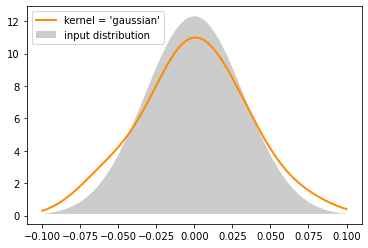

In [53]:
X = data['amygdala']
X = np.array(X)
X = X.reshape(-1,1)
# prob1 = [X[i:i + 1] for i in range(0, len(X), 1)]
N = len(X)
kde1D(X, 0.02)

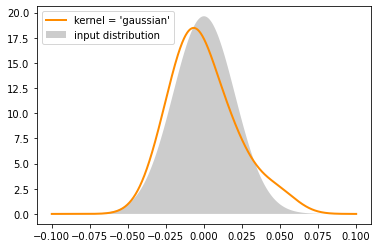

In [57]:
X = data['acc']
X = np.array(X)
X = X.reshape(-1,1)
N = len(X)
kde1D(X, 0.012)

In [60]:
from sklearn.neighbors import KernelDensity

def kde2D(x, y, bandwidth, kernel='gaussian', xbins=100j, ybins=100j, cmap='RdPu', **kwargs): 
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[x.min():x.max():xbins, y.min():y.max():ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth, **kwargs)
    kde.fit(xy_train)
    
    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde.score_samples(xy_sample))
    zz = np.reshape(z, xx.shape)

    plt.pcolormesh(xx, yy, zz, cmap=cmap, shading='auto')
    plt.scatter(x, y, s=1, facecolor='blue')
    cset = plt.contour(xx, yy, zz, colors='k', linewidths=0.5)
    plt.clabel(cset, inline=1, fontsize=10)

    return xx, yy, zz

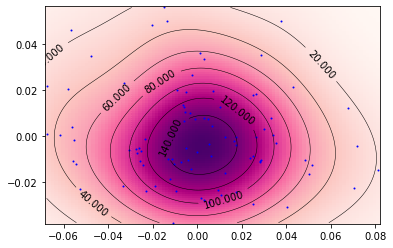

In [64]:
amygdala = data['amygdala']
amygdala = np.array(amygdala)
# amygdala = amygdala.reshape(-1,1)

acc = data['acc']
acc = np.array(acc)
# acc = acc.reshape(-1,1)
x,y,z = kde2D(amygdala, acc, 0.02);